# Solving a 1D Poisson equation with the finite element method (P2 elements)
### Obligatory project No. 2 in IN5270

## The 1D PDE

We want to use the finite element to numerically solve the following 1D Poisson equation:

$$ -u_{xx}(x) = 2x-1, \qquad x \in \Omega=[0,1], \qquad u_{x}(0)= C, \quad u(1) =D,$$

where C and D are two prescribed scalar constants. We seek an approximate solution u in some space V,

$$V =\text{span}\{\psi_0(x),...,\psi_{N_n}(x)\},$$

so that u can be expressed as a linear combination of
the basis functions 

$$ u = \sum_{j=0}^{N_n-1} c_j\psi_j.  $$

### Grid 

We will use a uniform mesh consisting of $N_e$ elements and piecewise quadratic polynomials (also called P2 elements) as basis functions. Having a uniformly partitioned mesh like this implies that our nodes become 

$$ x_i = ih, \quad \text{for} \quad i = 0, ..., N_n-1, $$

where $x_{N_n-1}$ is the rightmost node at $x=1$. Since we are working with P2 elements, it is implied that each element will contain one inner node wich is equivalent to having $N_n =2N_e + 1$ nodes or $2N_e$ intervals. This gives us a steplenght $h = 1/2N_e$. Since we know $u(1) = D$ we have number of unknowns $N = N_n -1$.

## Weak variational formulation

We wish to express the PDE in forms of only first derivatives, and to do so we begin with multiplying both sides of the PDE with a weight function, $v=\psi_i$, where $\psi_i$ is the $i$'th piecewise quadratic polynomial

$$-u_{xx}(x)v = fv. \qquad \qquad (*) $$

It is a known result from integration by parts that 

$$ (-u_xv)_x \equiv (-u_{xx}v) + (-u_xv_x)$$
$$\rightarrow \qquad -u_{xx}v = -(u_xv)_x + u_xv_x. $$

If we insert this into $(*)$ we get 
$$ u_xv_x - (u_xv)_x = fv. $$

Integrating both sides yield 

$$ \int_0^1 u_xv_x dx - \int_0^1 (u_xv)_x dx = \int_0^1 fv dx $$
$$\rightarrow \quad -[u_xv]_0^1 + \int_0^1 u_xv_x dx = \int_0^1 fv dx. $$

The inner product is defined as $\langle u, v\rangle = \int_0^1 uv$, so we can rewrite the expression above as 

$$ \langle u_x, v_x \rangle = \langle f, v \rangle + \langle u_x(1), v(1) \rangle - \langle u_x(0), v(0) \rangle ,$$

and by using the boundary conditions we arrive at 

$$  \langle u_x, v_x \rangle = \langle 2x-1, v \rangle + u_x(1) v(1) - Cv(0). $$

Knowing that $u(1) = D$ so that $u_x(1) = 0$ we can further simplify as

$$  \langle u_x, v_x \rangle = \langle 2x-1, v \rangle - Cv(0). $$

We define a suitable boundary function $B(x) = D\psi_{N_n -1}$. We choose this one since

$$\psi_{N_n -1}(x)=0 \qquad \text{for} \quad x\neq x_{Nn-1}$$

and 

$$\psi_{N_n -1}(x_{N_n-1})=1,$$

so it will only give a contribution at the last element. This gives us a case specific expression for u 

$$ u = D\psi_{N_n -1} + \sum_{j=0}^{N-1} c_j\psi_j. $$

Inserting this into our expression yields

$$ \sum_{j=0}^{N-1} \langle \psi_j', \psi_i'\rangle c_j = \langle 2x-1,\psi_i \rangle - \langle D\psi_{N_n -1}', \psi_i' \rangle - C\psi_i(0), $$

whis is our final weak variational formulation of the initial PDE.

We will now try to find the coefficients $c_j$ by solving the matrix equation
$$Ac = b, $$

where

$$\sum_{j=0}^{N_n-1}A_{ij}c_j =\sum_{j=0}^{N_n-1} \langle \psi_j', \psi_i'\rangle c_j, $$

and 

$$ b_i =\langle 2x-1,\psi_i \rangle - \langle D\psi_{N_n -1}', \psi_i' \rangle - C\psi_i(0).$$

We know that $-C\psi_i(0)=0$ for all $i\neq 0$, so this term will only contribute to $b_0$, the very first element in our right hand side vector, with value $-C\psi_0(0)= -C$. We also know that $\psi_{N_n -1}$ is only defined on the last interval, and so the term $\langle D\psi_{N_n -1}', \psi_i'\rangle$ will only appear when calculating $b_{N_n -2}$ and $b_{N_n -3}$.

### Derived exact solution of $u(x)$

We have 

$$u_{xx}(x) = 1-2x.$$

Integrating both sides gives us 

$$u_x(x) = x - x^2 + A,$$

and integrating both sides again yields

$$u(x) = \frac{x^2}{2}- \frac{x^3}{3} + Ax + B.$$

Using our boundary conditions

$$u_x(0) = C = A$$
$$u(1) = D = \frac{1}{6} + C + B \quad \rightarrow \quad B = D-\frac{1}{6}-C,$$

which gives us our final exact solution 

$$u(x) = \frac{x^2}{2}- \frac{x^3}{3} + Cx + D - C - \frac{1}{6}.$$

## Element matrix 

We use Lagrange polynomials as our piecewise quadratic polynomials. These are defined as

$$\psi_j = \prod_{i=0,i\neq j}^{d}\frac{x-x_i}{x_j-x_i}, $$

where $d =$ number of nodes in element $j$.


## The rightmost element 

The rightmost elements contain nodes $N_n -3, N_n -2$ and $N_n-1$. We calculate the lagrange polynomials by using the above definition and using that $x_i = ih$

$$\psi_{N_n -3} = \frac{(x-1+h)(x-1)}{2h^2},$$

$$\psi_{N_n -2} = -\frac{(x-1)(x-1+2h)}{h^2},$$

$$\psi_{N_n-1} = \frac{(x-1+h)(x-1+2h)}{2h^2}.$$

We will not use $\psi_{N_n-1}$ when finding the element matrix and vector, as the value in the last node $x_{N_n-1} = 1$ is known to be $u(1) = D$. This will be incorporated in the final approximation of $u$.
The entries in the element matrix for the leftmost element as well as the corresponding right hand side is calculated using sympy:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from time import time

x = sym.Symbol("x")
h = sym.Symbol("h")
D = sym.Symbol("D")
C = sym.Symbol("C")


psiNm2 = (x-1+h)*(x-1)/(2*h**2)
psiNm1 = -(x-1)*(x-1+2*h)/(h**2)
psiN = (x-1+h)*(x-1+2*h)/(2*h**2)


d_psiNm2 = sym.diff(psiNm2,x)
d_psiNm1 = sym.diff(psiNm1,x)
d_psiN = sym.diff(psiN,x)



psi_Nm1Nm1 = sym.simplify(d_psiNm1*d_psiNm1)
psi_Nm2Nm2 = sym.simplify(d_psiNm2*d_psiNm2)
psi_Nm1Nm2 = sym.simplify(d_psiNm1*d_psiNm2)

#Limits
L = 1- 2*h
R = 1

A_Nm1Nm1 = sym.simplify(sym.integrate(psi_Nm1Nm1, (x, L, R)))
A_Nm2Nm2 = sym.simplify(sym.integrate(psi_Nm2Nm2, (x, L, R)))
A_Nm1Nm2 = sym.simplify(sym.integrate(psi_Nm1Nm2, (x, L, R)))


f = 2*x - 1
rhs_Nm2 = sym.simplify(sym.integrate(sym.simplify(f*psiNm2),(x,L,R)) - sym.integrate(sym.simplify(D*d_psiN*d_psiNm2),(x,L,R)))
rhs_Nm1 = sym.simplify(sym.integrate(sym.simplify(f*psiNm1),(x,L,R)) - sym.integrate(sym.simplify(D*d_psiN*d_psiNm1),(x,L,R)))

A_rm = np.array([[A_Nm2Nm2,A_Nm1Nm2], [A_Nm1Nm2, A_Nm1Nm1]]).reshape(2,2)
print("Rightmost element matrix: \n\n",A_rm)

b_rm = np.array([rhs_Nm2, rhs_Nm1]).reshape(2,1)

print("\nRightmost element vector: \n\n",b_rm)



Rightmost element matrix: 

 [[7/(6*h) -4/(3*h)]
 [-4/(3*h) 8/(3*h)]]

Rightmost element vector: 

 [[-D/(6*h) - 4*h**2/3 + h/3]
 [(4*D - 8*h**3 + 4*h**2)/(3*h)]]


This gives us 

$$A =\frac{1}{h}\begin{bmatrix}
\frac{7}{6} & \frac{-4}{3}\\ \frac{-4}{3} & \frac{8}{3} 
\end{bmatrix}$$

and 

$$b =\begin{bmatrix} 
-D/6h - 4h^2/3 + h/3\\ (4D - 8h^3 + 4h^2)/3h\end{bmatrix}$$


As you can see, this is only a $2\times2$-matrix as the last element $u(1) = D$ is known. 


### The leftmost element

The leftmost elements contain nodes $0,1$ and $2$. We calculate the lagrange polynomials by using the above definition and using that $x_i = ih$

$$\psi_0 = \frac{(x-h)(x-2h)}{2h^2},$$

$$\psi_1 = -\frac{x(x-2h)}{h^2},$$

$$\psi_2 = \frac{x(x-h)}{2h^2}.$$

The entries in the element matrix for the leftmost element as well as the corresponding right hand side is calculated using sympy:

In [7]:

""" LEFTMOST ELEMENT """
#Limits
L = 0
R = 2*h

psi0 = (x-h)*(x-2*h)/(2*h**2)
psi1 = -x*(x-2*h)/(h**2)
psi2 = x*(x-h)/(2*h**2)

d_psi0 = sym.diff(psi0,x)
d_psi1 = sym.diff(psi1,x)
d_psi2 = sym.diff(psi2,x)

psi_00 = sym.simplify(d_psi0*d_psi0)
psi_11 = sym.simplify(d_psi1*d_psi1)
psi_22 = sym.simplify(d_psi2*d_psi2)
psi_01 = sym.simplify(d_psi0*d_psi1)
psi_02 = sym.simplify(d_psi0*d_psi2)
psi_12 = sym.simplify(d_psi1*d_psi2)

A_00 = sym.integrate(psi_00, (x, L, R))
A_11 = sym.integrate(psi_11, (x, L, R))
A_22 = sym.integrate(psi_22, (x, L, R))
A_01 = sym.integrate(psi_01, (x, L, R))
A_02 = sym.integrate(psi_02, (x, L, R))
A_12 = sym.integrate(psi_12, (x, L, R))


f = 2*x - 1
rhs_0 = sym.simplify(sym.integrate(sym.simplify(f*psi0),(x,L,R))) - C
rhs_1 = sym.simplify(sym.integrate(sym.simplify(f*psi1),(x,L,R)))
rhs_2 = sym.simplify(sym.integrate(sym.simplify(f*psi2),(x,L,R)))
A_lm = np.array([[A_00, A_01, A_02], [A_01, A_11, A_12], [A_02,A_12,A_22]]).reshape(3,3)
print("Leftmost element matrix: \n\n",A_lm)

b_lm = np.array([rhs_0, rhs_1, rhs_2]).reshape(3,1)

print("\nLeftmost element vector: \n\n",b_lm)


Leftmost element matrix: 

 [[7/(6*h) -4/(3*h) 1/(6*h)]
 [-4/(3*h) 8/(3*h) -4/(3*h)]
 [1/(6*h) -4/(3*h) 7/(6*h)]]

Leftmost element vector: 

 [[-C - h/3]
 [4*h*(2*h - 1)/3]
 [h*(4*h - 1)/3]]


This gives us 

$$A =\frac{1}{h}\begin{bmatrix}
\frac{7}{6} & \frac{-4}{3} & \frac{1}{6}\\ \frac{-4}{3} & \frac{8}{3} & \frac{-4}{3} \\ \frac{1}{6} & \frac{-4}{3} & \frac{7}{6}  
\end{bmatrix}$$

and 

$$b =\begin{bmatrix} 
-C - h/3\\ 4h(2h - 1)/3\\h(4h - 1)/3\end{bmatrix}$$


## Arbitrary interior element


For an arbitrary interior element contain nodes $j-1, j$ and $j+1$, where $j\in[3,N_n-4]$, we calculate the lagrange polynomials by using the above definition and using that $x_i = ih$

$$\psi_{j-1} = \frac{(x-hj)(x-hj-h)}{2h^2},$$

$$\psi_{j} = -\frac{(x-hj-h)(x-hj+h)}{h^2},$$

$$\psi_{j+1} = \frac{(x-hj)(x-hj+h)}{2h^2}.$$

The entries in the element matrix for the leftmost element as well as the corresponding right hand side is calculated using sympy:

In [8]:

""" ARBITRARY INNER ELEMENT """
j = sym.Symbol("j")

psi_jm1 = (x-h*j)*(x-h*j-h)/(2*h**2)
psi_j= -(x-h*j-h)*(x-h*j+h)/(h**2)
psi_jp1 = (x-h*j)*(x-h*j+h)/(2*h**2)

d_psi_jm1 = sym.diff(psi_jm1,x)
d_psi_j = sym.diff(psi_j,x)
d_psi_jp1 = sym.diff(psi_jp1,x)


psi_jj = sym.simplify(d_psi_j*d_psi_j)
psi_jm1jm1 = sym.simplify(d_psi_jm1*d_psi_jm1)
psi_jp1jp1 = sym.simplify(d_psi_jp1*d_psi_jp1)
psi_jjm1 = sym.simplify(d_psi_j*d_psi_jm1)
psi_jjp1 = sym.simplify(d_psi_j*d_psi_jp1)
psi_jm1jp1 = sym.simplify(d_psi_jm1*d_psi_jp1)

#Limits
L = h*(j-1)
R = h*(j+1)

A_jj = sym.simplify(sym.integrate(psi_jj, (x, L, R)))
A_jm1jm1 = sym.simplify(sym.integrate(psi_jm1jm1, (x, L, R)))
A_jp1jp1 = sym.simplify(sym.integrate(psi_jp1jp1, (x, L, R)))
A_jjm1 = sym.simplify(sym.integrate(psi_jjm1, (x, L, R)))
A_jjp1 = sym.simplify(sym.integrate(psi_jjp1, (x, L, R)))
A_jm1jp1 = sym.simplify(sym.integrate(psi_jm1jp1, (x, L, R)))


rhs_jm1 = sym.simplify(sym.integrate(sym.simplify(f*psi_jm1),(x,L,R)))
rhs_j = sym.simplify(sym.integrate(sym.simplify(f*psi_j),(x,L,R)))
rhs_jp1 = sym.simplify(sym.integrate(sym.simplify(f*psi_jp1),(x,L,R)))

A_ai = np.array([ [A_jm1jm1, A_jjm1, A_jm1jp1], [A_jjm1, A_jj, A_jjp1], [A_jm1jp1, A_jjp1, A_jp1jp1] ]).reshape(3,3)

print("Arbitrary interior element matrix: \n\n",A_ai)

b_ai = np.array([rhs_jm1, rhs_j, rhs_jp1]).reshape(3,1)

print("\nArbitrary interior element vector: \n\n",b_ai)

Arbitrary interior element matrix: 

 [[7/(6*h) -4/(3*h) 1/(6*h)]
 [-4/(3*h) 8/(3*h) -4/(3*h)]
 [1/(6*h) -4/(3*h) 7/(6*h)]]

Arbitrary interior element vector: 

 [[h*(2*h*j - 2*h - 1)/3]
 [4*h*(2*h*j - 1)/3]
 [h*(2*h*j + 2*h - 1)/3]]


This gives us the same entries to the element matrix as for the leftmost element, but a new right hand side:

$$b = \begin{bmatrix} h(2hj - 2h - 1)/3\\ 4h(2hj - 1)/3 \\ h(2hj + 2h - 1)/3
\end{bmatrix}$$



## Combining the element matrices and vectors

Wanting to solve the problem $A^{-1}b =c$, we have to stitch the element matrices and element vectors together. Here is an example using $N_e = 3$ and $x \in \Omega=[0,1]$so that we get three element matrices

$$A^0 = \begin{bmatrix} a^0_{00} & a^0_{01} & a^0_{02}\\ a^0_{10} & a^0_{11} & a^0_{12} \\ a^0_{20} & a^0_{21} & a^0_{22}\end{bmatrix},A^1 = \begin{bmatrix} a^1_{00} & a^1_{01} & a^1_{02}\\ a^1_{10} & a^1_{11} & a^1_{12} \\ a^1_{20} & a^1_{21} & a^1_{22}\end{bmatrix}, A^2 = \begin{bmatrix} a^2_{00} & a^2_{01}\\ a^2_{10} & a^2_{11}\end{bmatrix}, $$

where $A^0$ is the matrix corresponding to the leftmost element, $A^1$ is the matrix corresponding to the inner element and $A^2$ is the matrix corresponding to the rightmost element. We have three corresponding element vectors

$$b^0 = \begin{bmatrix} b^0_0\\b^0_1\\b^0_2\end{bmatrix}, b^1 = \begin{bmatrix} b^1_0\\b^1_1\\b^1_2\end{bmatrix}, b^2 = \begin{bmatrix} b^2_0\\b^2_1\end{bmatrix}.$$



Stitching them togheter gives us a $6\times6$ "block" matrix

$$A = \begin{bmatrix} a^0_{00} & a^0_{01} & a^0_{02} & 0 & 0 & 0\\ a^0_{10} & a^0_{11} & a^0_{12} & 0 & 0 & 0\\ a^0_{20} & a^0_{21} & a^0_{22}+ a^1_{00} & a^1_{01} & a^1_{02} & 0\\0&0 & a^1_{10} & a^1_{11} & a^1_{12} &0\\0&0&a^1_{20} & a^1_{21} & a^1_{22}+ a^2_{00} & a^2_{01}\\0&0&0&0&a^2_{10} & a^2_{11}\end{bmatrix}$$

and a $6\times 1$ vector

$$b = \begin{bmatrix} b^0_0\\b^0_1\\b^0_2+b^1_0\\b^1_1\\b^1_2+b^2_0\\b^2_1 \end{bmatrix}. $$

Solving $A^{-1}b =c$ provides us with a matrix

$$c = \begin{bmatrix} c_0\\c_1\\c_2\\c_3\\c_4\\c_5 \end{bmatrix}$$

containing the coefficients in front of our basis functions in the expression for our approximation $u$. We must now remember to incorporate the boundary condition, and with this in mind we get the full expression for our approximation

$$u(x) =\left\{
\begin{array}{ll}
      c_0\psi_0 + c_1\psi_1 + c_2\psi_2 & x\leq \frac{1}{3} \\
      c_2\psi_3 + c_3\psi_4 + c_4\psi_5 & \frac{1}{3}< x < \frac{2}{3} \\
      c_4\psi_6 + c_5\psi_7 + D\psi_8 & \frac{2}{3}\leq x \\
\end{array} 
\right.$$

## Implementation of the numerical solution

Below is a class solver which solves a 1D PDE on the interval $x\in \Omega[0,1]$. In theory, since the solver takes both an analytical solution as well as a right hand side function, it can take any 1D PDE as long as the boundary conditions are $u_{x}(0) = C, u(1) = D$ and it lives on the domain $\Omega$. 

In [9]:
class FiniteElementSolverP2():
    def __init__(self, f, N_elements, C, D, analytical, grid_points):
        """ Initialize class variables and matrices/vectors of size according to number of elements"""



        self.Ne = N_elements
        self.gp = grid_points
        self.C = C
        self.D = D
        self.f = lambda x: f(x)
        self.tol = 10e-4
        self.x = sym.Symbol("x")

        self.h = 1/(2*self.Ne)
        self.global_matrix = np.zeros([2*self.Ne, 2*self.Ne])
        self.global_vector = np.zeros([2*self.Ne])
        self.psi = sym.zeros(3*self.Ne,1)

        self.analytical = lambda x,C,D: analytical(x,C,D)

        self.x_values = np.linspace(0,1,self.gp)

    def make_matrix(self):
        """ Calls all methods to produce the lagrange polynomials, the element matrix and right hand side vector."""
        self.leftmost_element()
        self.rightmost_element()
        self.interior_element()

        #Transforms all sympy symbolic expressions for the lagrange polynomials into callable functions.
        self.psi_funcs = [sym.lambdify([self.x], self.psi[i], modules = "numpy") for i in range(3*self.Ne)]

    def find_coefficients(self):
        """ Calls mathod to produce element matrix and vector and computes the coefficients. """
        self.make_matrix()
        self.coeffs = np.linalg.solve(self.global_matrix,self.global_vector)
        self.coeffs = np.append(self.coeffs, self.D)  #Initial condition


    def leftmost_element(self):
        """ Find element matrix and vector for the special case of the leftmost element """


        #Element limits
        L = 0
        R = 2*self.h

        psi0 = (self.x-self.h)*(self.x-2*self.h)/(2*self.h**2)
        psi1 = -self.x*(self.x-2*self.h)/(self.h**2)
        psi2 = self.x*(self.x-self.h)/(2*self.h**2)

        self.psi[0] = psi0
        self.psi[1] = psi1
        self.psi[2] = psi2

        d_psi0 = sym.diff(psi0,self.x)
        d_psi1 = sym.diff(psi1,self.x)
        d_psi2 = sym.diff(psi2,self.x)

        psi_00 = d_psi0*d_psi0
        psi_11 = d_psi1*d_psi1
        psi_22 = d_psi2*d_psi2
        psi_01 = d_psi0*d_psi1
        psi_02 = d_psi0*d_psi2
        psi_12 = d_psi1*d_psi2

        A_00 = sym.integrate(psi_00, (self.x, L, R))
        A_11 = sym.integrate(psi_11, (self.x, L, R))
        A_22 = sym.integrate(psi_22, (self.x, L, R))
        A_01 = sym.integrate(psi_01, (self.x, L, R))
        A_02 = sym.integrate(psi_02, (self.x, L, R))
        A_12 = sym.integrate(psi_12, (self.x, L, R))

        rhs_0 = sym.integrate(self.f(self.x)*psi0,(self.x,L,R)) - self.C
        rhs_1 = sym.integrate(self.f(self.x)*psi1,(self.x,L,R))
        rhs_2 = sym.integrate(self.f(self.x)*psi2,(self.x,L,R))

        a1 = [A_00,A_01,A_02]
        a2 = [A_01, A_11, A_12]
        a3 = [A_02, A_12, A_22]

        A = np.array([a1, a2, a3]).reshape(3,3)#Dette kan gjøres utenfor bro.
        b = np.array([rhs_0, rhs_1, rhs_2])


        for i in range(3):
            self.global_vector[i] = b[i]
            for j in range(3):
                self.global_matrix[i,j] = A[i,j]

    def interior_element(self):
        """ Find element matrix and vector for all interior elements."""

        temp = 0
        for j in range(3,2*self.Ne-2,2):

            L = (j-1)*self.h
            R = (j+1)*self.h

            psi_jm1 = (self.x-self.h*j)*(self.x-self.h*j-self.h)/(2*self.h**2)
            psi_j= -(self.x-self.h*j-self.h)*(self.x-self.h*j+self.h)/(self.h**2)
            psi_jp1 = (self.x-self.h*j)*(self.x-self.h*j+self.h)/(2*self.h**2)

            self.psi[j + temp] = psi_jm1
            self.psi[j + temp + 1] = psi_j
            self.psi[j + temp + 2] = psi_jp1

            d_psi_jm1 = sym.diff(psi_jm1,self.x)
            d_psi_j = sym.diff(psi_j,self.x)
            d_psi_jp1 = sym.diff(psi_jp1,self.x)

            psi_jj = d_psi_j*d_psi_j
            psi_jm1jm1 = d_psi_jm1*d_psi_jm1
            psi_jp1jp1 = d_psi_jp1*d_psi_jp1
            psi_jjm1 = d_psi_j*d_psi_jm1
            psi_jjp1 = d_psi_j*d_psi_jp1
            psi_jm1jp1 = d_psi_jm1*d_psi_jp1

            A_jj = sym.integrate(psi_jj, (self.x, L, R))
            A_jm1jm1 = sym.integrate(psi_jm1jm1, (self.x, L, R))
            A_jp1jp1 = sym.integrate(psi_jp1jp1, (self.x, L, R))
            A_jjm1 = sym.integrate(psi_jjm1, (self.x, L, R))
            A_jjp1 = sym.integrate(psi_jjp1, (self.x, L, R))
            A_jm1jp1 = sym.integrate(psi_jm1jp1, (self.x, L, R))

            rhs_jm1 = sym.integrate(self.f(self.x)*psi_jm1,(self.x,L,R))
            rhs_j = sym.integrate(self.f(self.x)*psi_j,(self.x,L,R))
            rhs_jp1 = sym.integrate(self.f(self.x)*psi_jp1,(self.x,L,R))

            a1 = [A_jm1jm1,A_jjm1,A_jm1jp1]
            a2 = [A_jjm1, A_jj, A_jjp1]
            a3 = [A_jm1jp1, A_jjp1, A_jp1jp1]

            A = np.array([a1, a2, a3]).reshape(3,3)
            b = np.array([rhs_jm1, rhs_j, rhs_jp1])

            for i in range(j-1,j+2):
                self.global_vector[i] += b[i-(j-1)]
                for k in range(j-1,j+2):
                    self.global_matrix[i,k] += A[i-(j-1),k-(j-1)]

            temp += 1

    def rightmost_element(self):
        """ Find element matrix and vector for the special case of the rightmost element """


        #Element limits
        L = 1 - 2*self.h
        R = 1

        psiN = (self.x-1+self.h)*(self.x-1+2*self.h)/(2*self.h**2)
        psiNm1 = -(self.x-1)*(self.x-1+2*self.h)/(self.h**2)
        psiNm2 = (self.x-1+self.h)*(self.x-1)/(2*self.h**2)

        self.psi[-1] = psiN
        self.psi[-2] = psiNm1
        self.psi[-3] = psiNm2

        d_psiNm2 = sym.diff(psiNm2,self.x)
        d_psiNm1 = sym.diff(psiNm1,self.x)
        d_psiN = sym.diff(psiN,self.x)

        psi_Nm1Nm1 = d_psiNm1*d_psiNm1
        psi_Nm2Nm2 = d_psiNm2*d_psiNm2
        psi_Nm1Nm2 = d_psiNm1*d_psiNm2

        A_Nm1Nm1 = sym.integrate(psi_Nm1Nm1, (self.x, L, R))
        A_Nm2Nm2 = sym.integrate(psi_Nm2Nm2, (self.x, L, R))
        A_Nm1Nm2 = sym.integrate(psi_Nm1Nm2, (self.x, L, R))

        rhs_Nm2 = sym.integrate(self.f(self.x)*psiNm2,(self.x,L,R)) - sym.integrate(self.D*d_psiN*d_psiNm2,(self.x,L,R))
        rhs_Nm1 = sym.integrate(self.f(self.x)*psiNm1,(self.x,L,R)) - sym.integrate(self.D*d_psiN*d_psiNm1,(self.x,L,R))

        a1 = [A_Nm2Nm2,A_Nm1Nm2]
        a2 = [A_Nm1Nm2, A_Nm1Nm1]

        A = np.array([a1, a2]).reshape(2,2)
        b = np.array([rhs_Nm2, rhs_Nm1])

        for i in range(2*self.Ne-2,2*self.Ne):
            self.global_vector[i] = b[i-(2*self.Ne-2)]
            for j in range(2*self.Ne-2,2*self.Ne):
                self.global_matrix[i,j] = A[i-(2*self.Ne-2), j-(2*self.Ne-2)]

    def u(self,x,i,temp):
        """Method that returns the approximated values for u(x) in a specified element."""
        return self.coeffs[i]*self.psi_funcs[i+temp](x) + self.coeffs[i+1]*self.psi_funcs[i+temp+1](x) + self.coeffs[i+2]*self.psi_funcs[i+temp+2](x)

    def calculate_numerical_solution(self):
        """ Calculates the approximated solution u(x) over entire grid."""

        self.u = np.vectorize(self.u)
        self.numerical = np.zeros(self.gp)   #Store value of u(x) in each gridpoint


        #Calculate special case of element 0
        L = 0
        R = 2*self.h
        end = np.where((np.abs(self.x_values - R)<=self.tol))[0][0]
        end += 1
        x = self.x_values[L:end]
        self.numerical[L:end] = self.u(x,0,0)
        temp = 1    #Starts as 1 since the 0th element is calculated outside the loop

        #Calculate value of u(x) in each element.
        for i in range(2,2*self.Ne,2):

            L = i* self.h
            R = L + 2*self.h

            #Find idices in x array to define element start/end
            start = np.where((np.abs(self.x_values - L)<=self.tol))[0][0]
            end = np.where((np.abs(self.x_values - R)<=self.tol))[0][0]

            #We want to find L < X <= R, except from first element where we want to include L=0.
            start += 1
            end += 1
            x = self.x_values[start:end]
            self.numerical[start:end] = self.u(x,i,temp)

            temp+=1

    def plot_solution(self):
        """Method to plot analytical vs. numerical solution. """

        plt.plot(self.x_values, self.analytical(self.x_values, self.C,self.D), label = "Analytical")
        plt.plot(self.x_values, self.numerical, label = "Numerical")
        plt.title("Numerical vs. Analytical Solution")
        plt.xlabel("x")
        plt.ylabel("u(x)")
        plt.legend()
        plt.show()


    def automatic_results(self):
        """ Method that calls all other relevant methods to produce
        numerical solution, plot to compare analytical to numerical solution and L2-norm of the error.
        """
        self.find_coefficients()
        self.calculate_numerical_solution()
        self.plot_solution()
        self.L2_norm()

    def L2_norm(self):
        """Calculates the L2-norm of the error."""
        analyticals = self.analytical(self.x_values, self.C, self.D)
        error = analyticals - self.numerical
        self.L2 = np.sqrt((1/self.gp)*np.sum(error**2))


We implement our right hand side function as well as the analytical solution:

In [10]:

def f(x):
    return 2*x - 1

def analytical(x,C,D):
    return 0.5*x**2 - (1/3)*x**3 + (x-1)*C + D - (1/6)



Let's see how our solver performs when trying to approximate $u(x)$ using $N_e = 3$ elements and $C=0.1,D=1$:

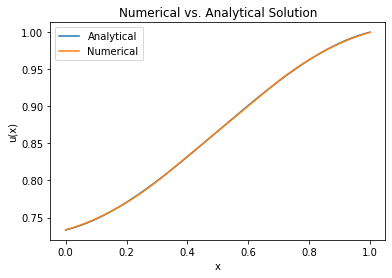

Time used =  3.586423873901367
L2-norm = 0.0004257533578156


In [11]:
Ne = 3
n = 1000   #Number of gridpoints to evaluate our approximation in
C = 0.1
D = 1

start = time()
my_solver = FiniteElementSolverP2(f, Ne, C, D, analytical, n)
my_solver.automatic_results()
end = time()

timeused = end - start
print("Time used = ", timeused)
print("L2-norm = %.16f" %(my_solver.L2))

What if we make the values of $C$ and $D$ large? Let's see:

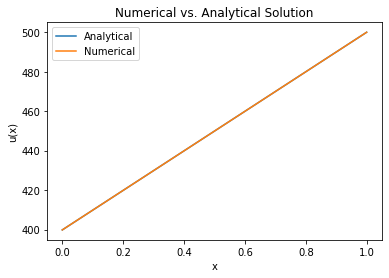

Time used =  1.8427000045776367
L2-norm = 0.0004257533534747


In [12]:
C = 100
D = 500

start = time()
my_solver = FiniteElementSolverP2(f, Ne, C, D, analytical, n)
my_solver.automatic_results()
end = time()

timeused = end - start
print("Time used = ", timeused)
print("L2-norm = %.16f" %(my_solver.L2))

As we can see deduce from the results above, the solver performs well with only three elements. After numerous tests with different choices of we found that the value of $D$ and $C$ had very little effect on the numerical precision of the solution, and so we choose not to include more than two examples. If you wish to check for yourself you can simply change the values of $C$, $D$ and $N_e$ in the code block above. Below is a code snippet which runs the solver for multiple values of $N_e$ and analyses the convergence rate

In [13]:
Ne_list = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
L2s = []
C = 0.1
D = 1

for ne in Ne_list:
        print("\n Ne = ", ne)
        my_solver = FiniteElementSolverP2(f, ne, C, D, analytical, n)
        my_solver.find_coefficients()
        my_solver.calculate_numerical_solution()
        my_solver.L2_norm()
        L2s.append(my_solver.L2)
        print("L2-norm = %.16f" %(my_solver.L2))

Ne_list = np.array(Ne_list)
L2s = np.array(L2s)

h = 1/Ne_list


r = []
for i in range(len(L2s)-1):
    r.append(np.log(L2s[i+1]/L2s[i])/np.log(h[i+1]/h[i]))

print(r)


 Ne =  3
L2-norm = 0.0004257533578156

 Ne =  4
L2-norm = 0.0001796146980103

 Ne =  5
L2-norm = 0.0000919627253961

 Ne =  6
L2-norm = 0.0000532191696796

 Ne =  7
L2-norm = 0.0000335141126518

 Ne =  8
L2-norm = 0.0000224518374800

 Ne =  9
L2-norm = 0.0000157686421503

 Ne =  10
L2-norm = 0.0000114953409357

 Ne =  11
L2-norm = 0.0000086366203378

 Ne =  12
L2-norm = 0.0000066523942021

 Ne =  13
L2-norm = 0.0000052322896315

 Ne =  14
L2-norm = 0.0000041892628001

 Ne =  15
L2-norm = 0.0000034060274182

 Ne =  16
L2-norm = 0.0000028064813668

 Ne =  17
L2-norm = 0.0000023397810096

 Ne =  18
L2-norm = 0.0000019710808282

 Ne =  19
L2-norm = 0.0000016759401639

 Ne =  20
L2-norm = 0.0000014369254308
[2.999999996480306, 2.999999999280168, 3.0000000113140866, 3.00000000633432, 2.9999999021504866, 3.000000489072191, 2.9999993328031964, 2.9999993301172134, 3.000004487441054, 2.999996588272792, 3.000003752684522, 2.999993175040992, 2.99999306868467, 3.0000051346015524, 3.000001080686891

As you can see we get an observed convergence rate of $=3$, which is consistent with the excpected convergence rate for P2 elements since we use quadratic polynomials.